<a href="https://colab.research.google.com/github/Allen123321/DEMO-DL/blob/master/Task2_%E8%AE%BA%E6%96%87%E4%BD%9C%E8%80%85%E7%BB%9F%E8%AE%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  任务说明
任务主题：论文作者统计，统计所有论文作者出现频率Top10的姓名；<br>
任务内容：论文作者的统计、使用 Pandas 读取数据并使用字符串操作；<br>
任务成果：学习 Pandas 的字符串操作；<br>
[github链接(原教程):](https://github.com/datawhalechina/team-learning-data-mining/blob/master/AcademicTrends/Task2%20%E8%AE%BA%E6%96%87%E4%BD%9C%E8%80%85%E7%BB%9F%E8%AE%A1.ipyn)

## 具体代码实现





In [7]:
!mv -f /content/kaggle.json  /root/.kaggle  #添加kaggle.json到colab中

In [8]:
!kaggle datasets download -d Cornell-University/arxiv #从kaggle上下载数据集到colab中

 99% 893M/906M [00:06<00:00, 190MB/s]
100% 906M/906M [00:06<00:00, 148MB/s]


In [10]:
!unzip -o /content/arxiv.zip #解压

Archive:  /content/arxiv.zip
  inflating: arxiv-metadata-oai-snapshot.json  


In [9]:
# 导入所需的package
import seaborn as sns #用于画图
from bs4 import BeautifulSoup #用于爬取arxiv的数据
import re #用于正则表达式，匹配字符串的模式
import requests #用于网络连接，发送网络请求，使用域名获取对应信息
import json #读取数据，我们的数据为json格式的
import pandas as pd #数据处理，数据分析
import matplotlib.pyplot as plt #画图工具

In [12]:

def readArxivFile(path, columns=['id', 'submitter', 'authors', 'title', 'comments', 'journal-ref', 'doi',
                                 'report-no', 'categories', 'license', 'abstract', 'versions',
                                 'update_date', 'authors_parsed'], count=None):
  data= []
  with open(path,'r') as f:
    for idx,line in enumerate(f):
      if idx == count:
        break

      d = json.loads(line)
      d = {col:d[col] for col in columns}  
      data.append(d)

  data = pd.DataFrame(data)

  return data

data = readArxivFile('arxiv-metadata-oai-snapshot.json',['id', 'authors', 'categories', 'authors_parsed'],100000)

      

## 数据统计
接下来我们将完成以下统计操作：

统计所有作者姓名出现频率的Top10；<br>
统计所有作者姓（姓名最后一个单词）的出现频率的Top10；<br>
统计所有作者姓第一个字符的频率；<br>

In [13]:
data2 = data[data['categories'].apply(lambda x : 'cs.CV' in x)] # 选择类别为cs.CV下面的论文
data2.head()

,id,authors,categories,authors_parsed
1266,0704.1267,"Laurence Likforman-Sulem, Abderrazak Zahour, B...",cs.CV,"[[Likforman-Sulem, Laurence, ], [Zahour, Abder..."
3634,0704.3635,Fulufhelo Vincent Nelwamondo and Tshilidzi Mar...,cs.CV cs.IR,"[[Nelwamondo, Fulufhelo Vincent, ], [Marwala, ..."
4201,0705.0199,"Erik Berglund, Joaquin Sitte",cs.NE cs.AI cs.CV,"[[Berglund, Erik, ], [Sitte, Joaquin, ]]"
4216,0705.0214,"Mourad Zerai, Maher Moakher",cs.CV,"[[Zerai, Mourad, ], [Moakher, Maher, ]]"
4451,0705.0449,"Pierre-Fran\c{c}ois Marteau (VALORIA), Gilbas ...",cs.CV,"[[Marteau, Pierre-François, , VALORIA], [Ménie..."


# sum 拼接list


```

a = [[1], [2], [3], [4], [5]] 
 
sum(a, [])  
# [1, 2, 3, 4, 5]

>>> a = [[1,2],[3],[4,5,6,7],[8]]
>>> sum(a,[])
[1, 2, 3, 4, 5, 6, 7, 8]
```



In [15]:
# 拼接所有作者
print(data2['authors_parsed'])
print(sum(data2['authors_parsed'], []))
all_authors = sum(data2['authors_parsed'], [])

1266     [[Likforman-Sulem, Laurence, ], [Zahour, Abder...
3634     [[Nelwamondo, Fulufhelo Vincent, ], [Marwala, ...
4201              [[Berglund, Erik, ], [Sitte, Joaquin, ]]
4216               [[Zerai, Mourad, ], [Moakher, Maher, ]]
4451     [[Marteau, Pierre-François, , VALORIA], [Ménie...
                               ...                        
97466                             [[Alagoz, B. Baykant, ]]
98435                                [[Abenius, Tobias, ]]
98700    [[Valiollahzadeh, Seyyed Majid, ], [Sayadiyan,...
98701    [[Valiollahzadeh, Seyyed Majid, ], [Sayadiyan,...
99018    [[Zayyani, Hadi., ], [Valiollahzadeh, Seyyedma...
Name: authors_parsed, Length: 134, dtype: object
[['Likforman-Sulem', 'Laurence', ''], ['Zahour', 'Abderrazak', ''], ['Taconet', 'Bruno', ''], ['Nelwamondo', 'Fulufhelo Vincent', ''], ['Marwala', 'Tshilidzi', ''], ['Berglund', 'Erik', ''], ['Sitte', 'Joaquin', ''], ['Zerai', 'Mourad', ''], ['Moakher', 'Maher', ''], ['Marteau', 'Pierre-François', '',

处理完成后all_authors变成了所有一个list，其中每个元素为一个作者的姓名。

## 完成姓名频率的统计。

In [16]:
# 拼接所有的作者
authors_names = [' '.join(x) for x in all_authors]
print(authors_names)

['Likforman-Sulem Laurence ', 'Zahour Abderrazak ', 'Taconet Bruno ', 'Nelwamondo Fulufhelo Vincent ', 'Marwala Tshilidzi ', 'Berglund Erik ', 'Sitte Joaquin ', 'Zerai Mourad ', 'Moakher Maher ', 'Marteau Pierre-François  VALORIA', 'Ménier Gilbas  VALORIA', 'Spiller Jonathan M. ', 'Marwala T. ', 'Falk D. L. ', 'Rubin D. M. ', 'Marwala T. ', 'Surajpal Dhiresh R. ', 'Marwala Tshilidzi ', 'Machowski Lukasz A ', 'Marwala Tshilidzi ', 'Graves Alex ', 'Fernandez Santiago ', 'Schmidhuber Juergen ', 'Cohen Asaf ', 'Weissman Tsachy ', 'Merhav Neri ', 'Jacquet W. ', 'de Groen P. ', 'Sofge Donald A. ', 'Beezley Jonathan D. ', 'Mandel Jan ', 'Lichtenwalner Peter F. ', 'Sofge Donald A. ', 'Scurrell Simon ', 'Marwala Tshilidzi ', 'Rubin David ', 'Sofge D. A. ', 'Bezzi Michele ', 'Groenevelt Robin ', 'Coltuc Dinu  GIPSA-lab', 'Chassery Jean-Marc  GIPSA-lab', 'Bartolo Alexandra ', 'McGuire Patrick C. ', 'Camilleri Kenneth P. ', 'Spiteri Christopher ', 'Borg Jonathan C. ', 'Farrugia Philip J. ', 'Ormo 

In [17]:
authors_names = pd.DataFrame(authors_names)
print(authors_names)

                                 0
0        Likforman-Sulem Laurence 
1               Zahour Abderrazak 
2                   Taconet Bruno 
3    Nelwamondo Fulufhelo Vincent 
4               Marwala Tshilidzi 
..                             ...
318          Sayadiyan Abolghasem 
319               Nazari Mohammad 
320                 Zayyani Hadi. 
321    Valiollahzadeh Seyyedmajid 
322         Babaie-Zadeh Massoud. 

[323 rows x 1 columns]


Text(0.5, 0, 'Count')

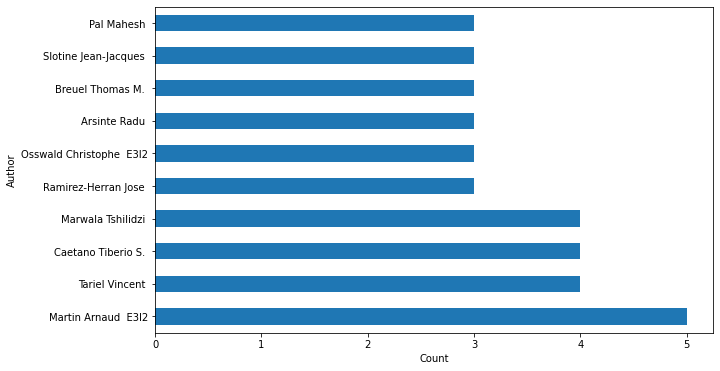

In [20]:
# 根据作者频率绘制直方图
plt.figure(figsize=(10, 6))
authors_names[0].value_counts().head(10).plot(kind='barh')
# 修改图配置
names = authors_names[0].value_counts().index.values[:10]
_ = plt.yticks(range(0, len(names)), names)
plt.ylabel('Author')
plt.xlabel('Count')

接下来统计姓名姓，也就是authors_parsed字段中作者第一个单词：

In [21]:
authors_lastnames = [x[0] for x in all_authors]
authors_lastnames = pd.DataFrame(authors_lastnames)
print(authors_lastnames)

                   0
0    Likforman-Sulem
1             Zahour
2            Taconet
3         Nelwamondo
4            Marwala
..               ...
318        Sayadiyan
319           Nazari
320          Zayyani
321   Valiollahzadeh
322     Babaie-Zadeh

[323 rows x 1 columns]


Text(0.5, 0, 'Count')

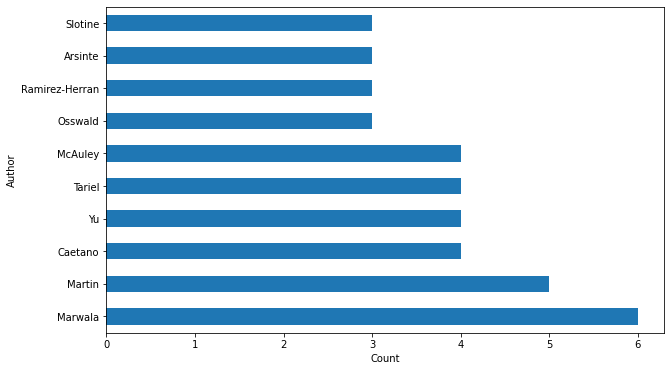

In [24]:
plt.figure(figsize=(10, 6))
authors_lastnames[0].value_counts().head(10).plot(kind='barh')

names = authors_lastnames[0].value_counts().index.values[:10]
_ = plt.yticks(range(0, len(names)), names)
plt.ylabel('Author')
plt.xlabel('Count')

统计所有作者姓第一个字符的频率

In [29]:
authors_first_letter = [x[0][0:1] for x in all_authors]
print(authors_first_letter)
authors_first_letter = pd.DataFrame(authors_first_letter)
print(authors_first_letter)

['L', 'Z', 'T', 'N', 'M', 'B', 'S', 'Z', 'M', 'M', 'M', 'S', 'M', 'F', 'R', 'M', 'S', 'M', 'M', 'M', 'G', 'F', 'S', 'C', 'W', 'M', 'J', 'd', 'S', 'B', 'M', 'L', 'S', 'S', 'M', 'R', 'S', 'B', 'G', 'C', 'C', 'B', 'M', 'C', 'S', 'B', 'F', 'O', 'G', 'R', 'D', 'R', 'H', 'O', 'O', 'D', 'K', 'R', 'K', 'R', 'K', 'R', 'M', 'L', 'B', 'P', 'H', 'D', 'M', 'C', 'B', 'M', 'C', 'A', 'K', 'T', 'B', 'K', 'J', 'D', 'X', 'K', 'T', 'O', 'G', 'S', 'A', 'S', 'B', 'E', 'N', 'A', 'C', 'D', 'V', 'A', 'G', 'T', 'I', 'B', 'B', 'B', 'D', 'K', 'E', 'P', 'B', 'P', 'C', 'S', 'A', 'P', 'L', 'O', 'G', 'A', 'R', 'G', 'W', 'Y', 'L', 'Z', 'B', 'V', 'J', 'B', 'D', 'L', 'P', 'P', 'M', 'P', 'A', 'I', 'A', 'M', 'S', 'H', 'A', 'M', 'S', 'V', 'C', 'F', 'M', 'M', 'R', 'L', 'K', 'X', 'X', 'G', 'D', 'B', 'C', 'R', 'C', 'N', 'S', 'R', 'L', 'C', 'C', 'B', 'L', 'Z', 'd', 'F', 'L', 'N', 'G', 'C', 'C', 'B', 'Y', 'Z', 'R', 'K', 'M', 'S', 'L', 'J', 'F', 'A', 'R', 'L', 'J', 'F', 'A', 'R', 'S', 'L', 'M', 'C', 'J', 'Z', 'H', 'T', 'Y', 'P',

Text(0.5, 0, 'Count')

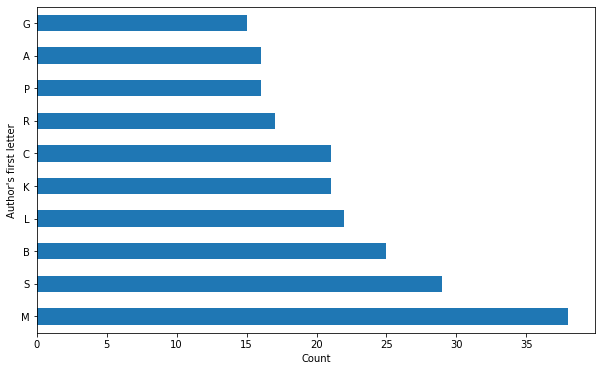

In [31]:
plt.figure(figsize=(10, 6))
authors_first_letter[0].value_counts().head(10).plot(kind='barh')

first_letter = authors_first_letter[0].value_counts().index.values[:10]
_ = plt.yticks(range(0, len(first_letter)), first_letter)
plt.ylabel('Author\'s first letter')
plt.xlabel('Count')